In [1]:
from eventsreader import SpdmeEventsReader
from surrogatedistributionbuilder import SurrogateDistributionBuilder
from distributionbuilder import DistributionBuilder
from bins import Bins
from ROOT import TCanvas, TMath
from utils import calcOneChi2
import math

Welcome to JupyROOT 6.28/04


In [2]:
bins = Bins.readFrom("ranges.yml")
filenameData = "apr12_diele_088_090_ag123ag_2500A_accepted_np_2.dat"
readerData = SpdmeEventsReader(filenameData)
builderData = DistributionBuilder("testData", readerData.getEvents(), bins)
filename = "medium_isotropic_eff_ag1230ag_np_9deg.dat"
reader = SpdmeEventsReader(filename)
builder = SurrogateDistributionBuilder("test", reader.getEvents(), bins)

iter 0
Before processing events 16:04:18
After processing events 16:04:20


In [3]:
# lambda_theta, lambda_phi, lambda_theta_phi = 2.2668e-01, -2.8663e-01, -3.4256e-01
# lambda_theta, lambda_phi, lambda_theta_phi = 1, 0, 0
#lambda_theta, lambda_phi, lambda_theta_phi = -6.7520e-01,  5.0837e-02,  1.0768e-02
lambda_theta, lambda_phi, lambda_theta_phi = -1.0,  0, 0

builder.setParameters(lambda_theta, lambda_phi, lambda_theta_phi)
hists = builder.getHists()
builderData.setParameters(1.0, 0.0, 0.0)
histsData = builderData.getHists()

iter 1
Before processing events 16:04:21
After processing events 16:04:21


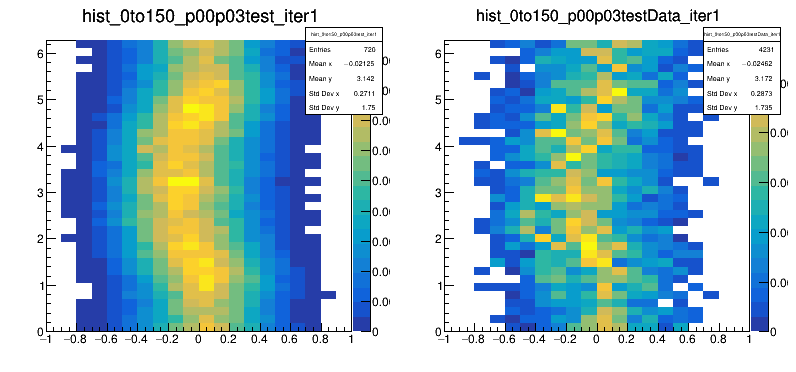

In [4]:
can3 = TCanvas("c","C",800,400)
can3.Divide(2,1)
can3.Draw()
can3.cd(1)
hists[0][1].Draw("COLZ")
can3.cd(2)
histsData[0][1].Draw("COLZ")

In [5]:
chi2, ndf = calcOneChi2(hists[0][1], histsData[0][1])
print(chi2, ndf, 1.0/(chi2 / ndf))

592.0696972372883 484 0.8174713251808657


In [11]:
import numpy as np
np.uint8(21.0)

21